<a href="https://colab.research.google.com/github/nehaljain21/Heart_Disease_prediction/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Heart.csv to Heart.csv


In [2]:
import pandas as pd
df = pd.read_csv('Heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [21]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [9]:
df["Sex"].value_counts()

,count
Sex,
M,725
F,193


In [10]:
df.groupby('Sex')['HeartDisease'].value_counts()

Sex  HeartDisease
F    0               143
     1                50
M    1               458
     0               267
Name: count, dtype: int64

In [11]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [12]:
df['FastingBS'].value_counts()

,count
FastingBS,
0,704
1,214


In [15]:
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [13]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [14]:
print("Maximum Age according to Heart Disease:\n",df.groupby("HeartDisease")["Age"].max())
print("Minimum Age according to Heart Disease:\n",df.groupby("HeartDisease")["Age"].min())
print("Average Age according to Heart Disease:\n",df.groupby("HeartDisease")["Age"].mean())

Maximum Age according to Heart Disease:
 HeartDisease
0    76
1    77
Name: Age, dtype: int64
Minimum Age according to Heart Disease:
 HeartDisease
0    28
1    31
Name: Age, dtype: int64
Average Age according to Heart Disease:
 HeartDisease
0    50.551220
1    55.899606
Name: Age, dtype: float64


<Axes: ylabel='count'>

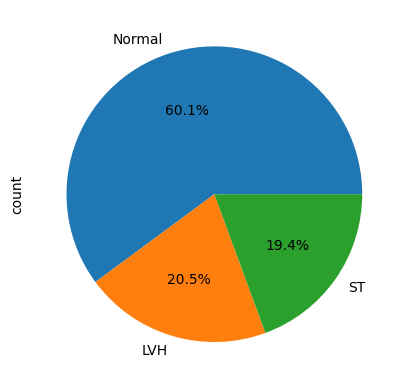

In [24]:
df['RestingECG'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

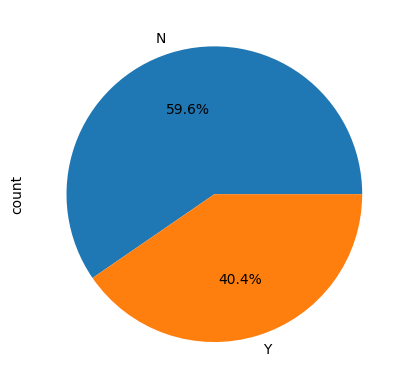

In [22]:
df['ExerciseAngina'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

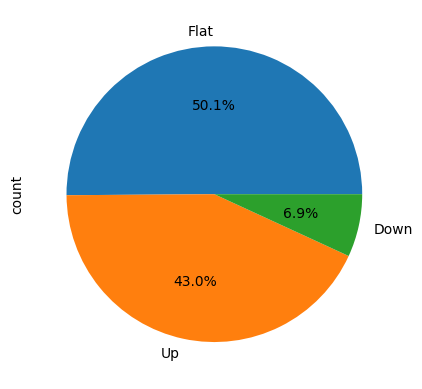

In [20]:
df['ST_Slope'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Sex,HeartDisease'>

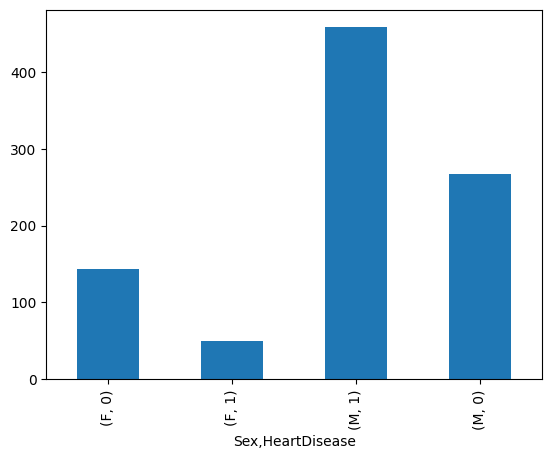

In [25]:
df.groupby('Sex')['HeartDisease'].value_counts().plot(kind='bar')

<Axes: xlabel='ChestPainType'>

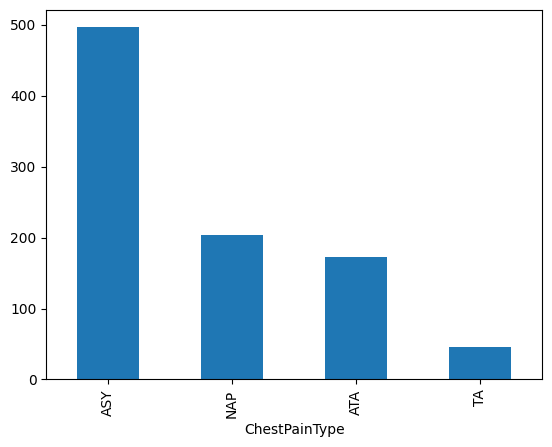

In [26]:
df['ChestPainType'].value_counts().plot(kind='bar')

<Axes: xlabel='FastingBS'>

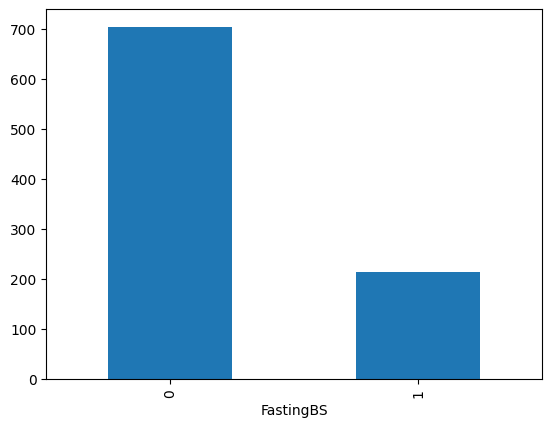

In [27]:
df['FastingBS'].value_counts().plot(kind='bar')

Sex
F    0.668912
M    0.945517
Name: Oldpeak, dtype: float64


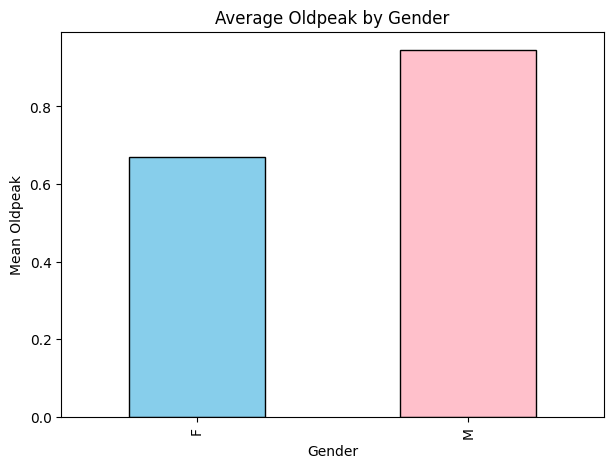

In [29]:
import matplotlib.pyplot as plt
oldpeak_by_gender = df.groupby('Sex')['Oldpeak'].mean()
print(oldpeak_by_gender)
plt.figure(figsize=(7,5))
oldpeak_by_gender.plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black')
plt.title('Average Oldpeak by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Oldpeak')
plt.show()